In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv("/kaggle/input/titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
print(train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


<AxesSubplot:>

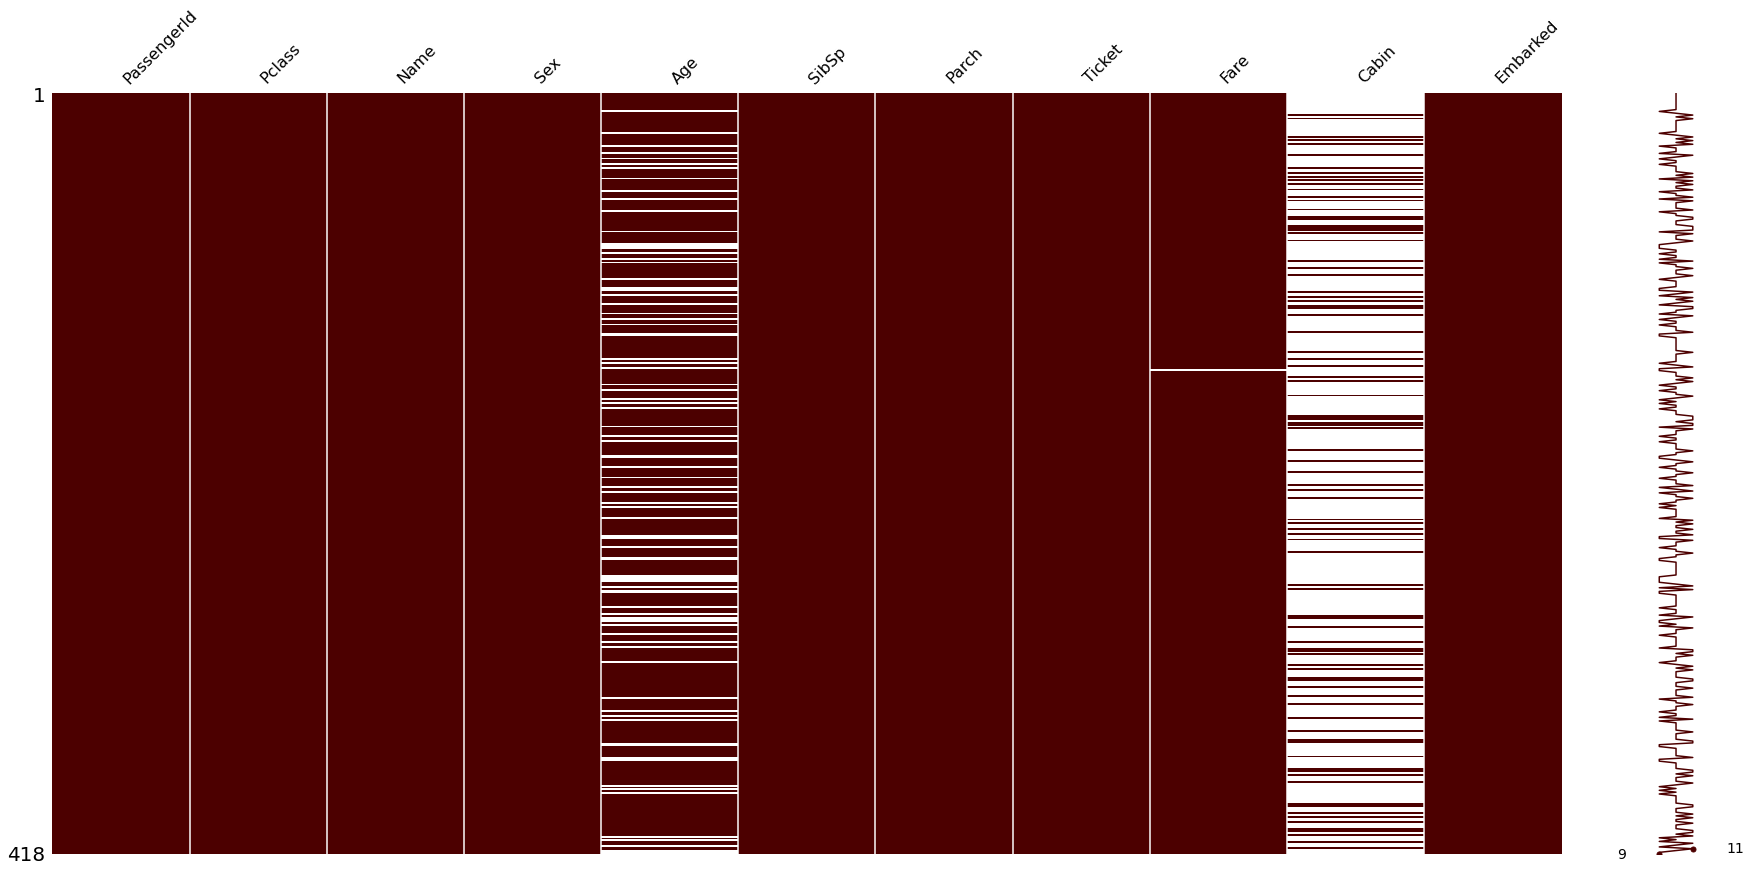

In [5]:
import missingno as msno

msno.matrix(df=test, figsize=(30, 14), color=(0.3, 0, 0))

Removing columns with misleading or unnecessary information

In [6]:
train = train.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)
test = test.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)

In [7]:
train['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [8]:
X = pd.get_dummies(train.drop("PassengerId", axis = 1))
Test = pd.get_dummies(test.drop("PassengerId", axis = 1))

In [9]:
from sklearn.preprocessing import LabelEncoder

for i in range(X.shape[1]):
    print(X.iloc[:, i])
    if X.iloc[:, i].dtypes == object:
        lenc = LabelEncoder()
        lenc.fit(list(X.iloc[:, i].values)+list(Test.iloc[:, i].values))
        X.iloc[:, i] = lenc.transform(list(X.iloc[:, i].values))
        Test.iloc[:, i] = lenc.transform(list(Test.iloc[:, i].values))

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64
0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64
0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 891, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex_female, Length: 891, dtype: uint8
0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex_male, Length: 891, dtype: uint8


In [10]:
X.head()

,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male
0,0,3,1,0,0,1
1,1,1,1,0,1,0
2,1,3,0,0,1,0
3,1,1,1,0,1,0
4,0,3,0,0,0,1


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X.drop("Survived", axis=1), X['Survived'], test_size = 0.2, random_state = 0)

In [12]:
X_train.head()

,Pclass,SibSp,Parch,Sex_female,Sex_male
140,3,0,2,1,0
439,2,0,0,0,1
817,2,1,1,0,1
378,3,0,0,0,1
491,3,0,0,0,1


In [13]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [14]:
print("Accuracy: ",clf.score(X_val, y_val))

Accuracy:  0.7988826815642458
